# Decision tree learning

In [3]:
from IPython.display import Image
%matplotlib inline

In [4]:
# define plot_decision_regions for later use

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

# Load the Med Trial dataset

In [6]:
import numpy as np
import pandas as pd

medTrial = pd.read_csv("MedTrial.csv")
medTrial

,Age,Sex,BP,Cholesterol,Na_to_K,Med
0,23,F,HIGH,HIGH,25.355,Yipic
1,47,M,LOW,HIGH,13.093,Comodify
2,47,M,LOW,HIGH,10.114,Comodify
3,28,F,NORMAL,HIGH,7.798,Xlenify
4,61,F,LOW,HIGH,18.043,Yipic
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,Comodify
196,16,M,LOW,HIGH,12.006,Comodify
197,52,M,NORMAL,HIGH,9.894,Xlenify
198,23,M,NORMAL,NORMAL,14.020,Xlenify


### Perform Exploratory Data Analysis according to ICHW 1

In [7]:
# change categorical values of variety to numeric values
from sklearn.preprocessing import LabelEncoder 
# initializing an object of class LabelEncoder
labelencoder= LabelEncoder()

# fitting and transforming the desired categorical column
medTrial['BP'] = labelencoder.fit_transform(medTrial['BP']) 
medTrial['Cholesterol'] = labelencoder.fit_transform(medTrial['Cholesterol'])
medTrial['Sex'] = labelencoder.fit_transform(medTrial['Sex'])
medTrial['Med'] = labelencoder.fit_transform(medTrial['Med'])

medTrial

,Age,Sex,BP,Cholesterol,Na_to_K,Med
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [8]:
# Handle outliers with IQR method previously done in HW2-A

In [9]:
Q1 = medTrial.quantile(0.25)
Q3 = medTrial.quantile(0.75)
IQR = Q3 - Q1

df2 = ((medTrial < (Q1 - 1.5 * IQR)).sum()) 
df3 = ((medTrial > (Q3 + 1.5 * IQR)).sum())

for i in range(len(medTrial["Na_to_K"])):
    if medTrial["Na_to_K"][i] > (Q3["Na_to_K"] + 1.5 * IQR["Na_to_K"]):
        medTrial.loc[i, 'Na_to_K'] = 19
        
# Confirm that outliers are handled
new_lower = ((medTrial < (Q1 - 1.5 * IQR)).sum()) 
new_upper = ((medTrial > (Q3 + 1.5 * IQR)).sum())
print(new_lower)
print(new_upper)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Med            0
dtype: int64
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Med            0
dtype: int64


In [10]:
# Display the correlation and heatmap from part A
import seaborn as sns

medTrial.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Med
Age,1.000000,0.102027,0.054212,-0.068234,-0.060580,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.137977,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.121338,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.013970,0.055629
Na_to_K,-0.060580,-0.137977,-0.121338,0.013970,1.000000,0.608229
Med,-0.004828,-0.098573,0.372868,0.055629,0.608229,1.000000


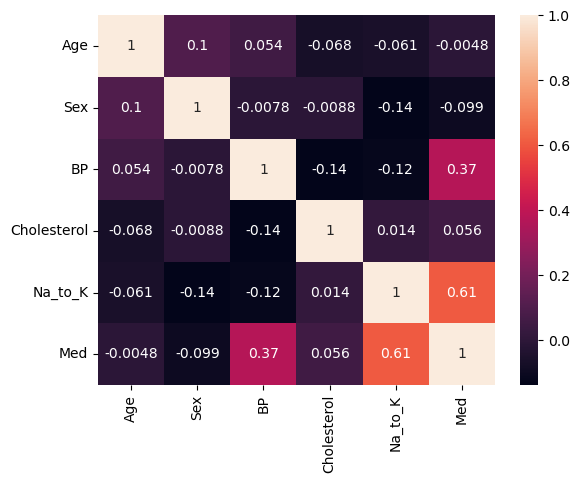

In [11]:
sns.heatmap(medTrial.corr(), annot=True)
plt.show()

### From the heatmap, BP and Na_to_K yielded the highest correlation value

In [12]:
# Sort the class by name for easier extraction in the next cell
medTrial_sorted = medTrial.sort_values(by='Med')
medTrial_sorted

,Age,Sex,BP,Cholesterol,Na_to_K,Med
66,29,1,0,0,12.856,0
144,39,1,0,0,9.664,0
118,32,0,0,1,10.292,0
110,50,1,0,0,7.490,0
36,32,1,0,1,9.445,0
...,...,...,...,...,...,...
74,31,1,0,1,17.069,4
73,41,0,2,1,22.905,4
71,28,0,2,0,19.675,4
68,54,1,2,0,24.658,4


In [13]:
# Show the value count of each class to use in iloc
each_class = medTrial_sorted['Med'].value_counts()
print(each_class)

4    91
3    54
0    23
1    16
2    16
Name: Med, dtype: int64


In [14]:
# 1. Arrange the data into featues and target arrays.

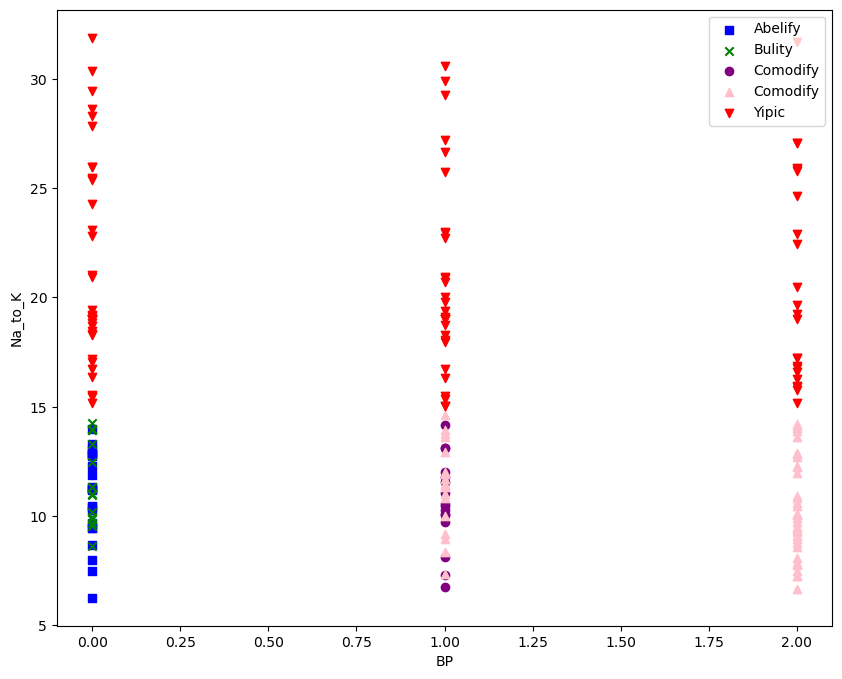

In [15]:
# scatter plot using the features with the highest correlation
Abelify_bp = medTrial_sorted.iloc[0:23, 2].values
Abelify_Na2K_ = medTrial_sorted.iloc[0:23, 4].values
Bulity_bp = medTrial_sorted.iloc[23:39, 2].values
Bulity_Na2K_ = medTrial_sorted.iloc[23:39, 4].values
Comodify_bp = medTrial_sorted.iloc[39:55, 2].values
Comodify_Na2K_ = medTrial_sorted.iloc[39:55, 4].values
Xlenify_bp = medTrial_sorted.iloc[55:109, 2].values
Xlenify_Na2K_ = medTrial_sorted.iloc[55:109, 4].values
Yipic_bp = medTrial_sorted.iloc[109:200, 2].values
Yipic_Na2K_ = medTrial_sorted.iloc[109:200, 4].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

ax.scatter(Abelify_bp, Abelify_Na2K_, label="Abelify", marker="s", facecolor="blue")
ax.scatter(Bulity_bp, Bulity_Na2K_, label="Bulity", marker="x", 
           facecolor="green")
ax.scatter(Comodify_bp, Comodify_Na2K_, label="Comodify", marker="o", 
           facecolor="purple") 
ax.scatter(Xlenify_bp, Xlenify_Na2K_, label="Comodify", marker="^", 
           facecolor="pink") 
ax.scatter(Yipic_bp, Yipic_Na2K_, label="Yipic", marker="v", 
           facecolor="red") 

ax.set_xlabel("BP")
ax.set_ylabel("Na_to_K")
ax.legend()
plt.savefig('medtrialScatter.png', dpi=300)


# Steps to build ML model in sklean

In [16]:
# 1. Arrange the data into featues and target arrays.

In [17]:
# extract the age and NA_to_K for X
X = medTrial_sorted.iloc[:, [2, 4]].values
Y = medTrial_sorted.iloc[:, 5]

# print(X)
# print(Y)

In [18]:
# change Y (classes) from categorical to numeric
Y = pd.factorize(medTrial_sorted.iloc[:, 5])[0]
# print(Y)

In [19]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y)

In [21]:
print('Labels count in y:', np.bincount(Y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [23 16 16 54 91]
Labels count in y_train: [16 11 11 38 64]
Labels count in y_test: [ 7  5  5 16 27]


In [22]:
# 3. Select the ML algorithm, and its parameteters

In [23]:
from sklearn.tree import DecisionTreeClassifier

# In the case for HW2-B, we want a max_depth of 5, and the entropy impurity
tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=5, 
                                    random_state=1)

In [24]:
# 4. Build the model (.fit)

/tmp/ipykernel_127/1612307901.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_127/1612307901.py:41: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


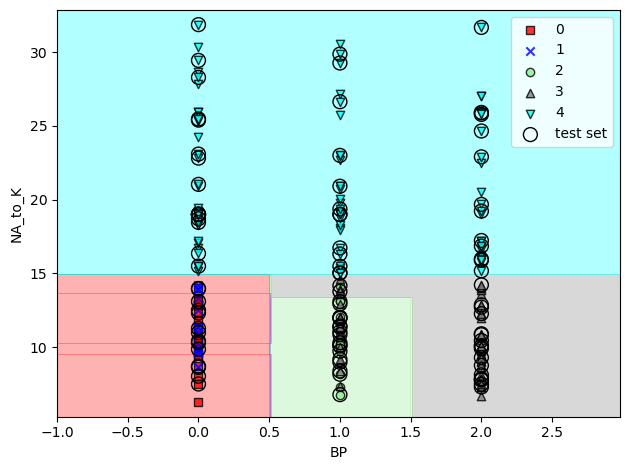

In [25]:
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 200))

plt.xlabel('BP')
plt.ylabel('NA_to_K')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('plots/plot_decision_regions.png', dpi=300)
plt.show()

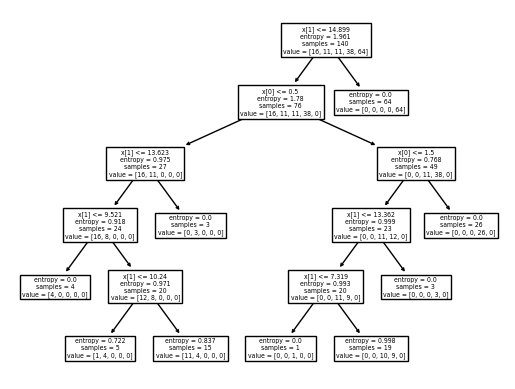

In [26]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.savefig('plots/tree_model.pdf')
plt.show()

In [27]:
# make it nice

In [28]:
%pip install pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Abelify', 
                                        'Bulity',
                                        'Yipic',
                                       'Comodify',
                                       'Xlenify'],
                           feature_names=['BP', 
                                          'NA_to_K'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

  Using cached pydotplus-2.0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


True

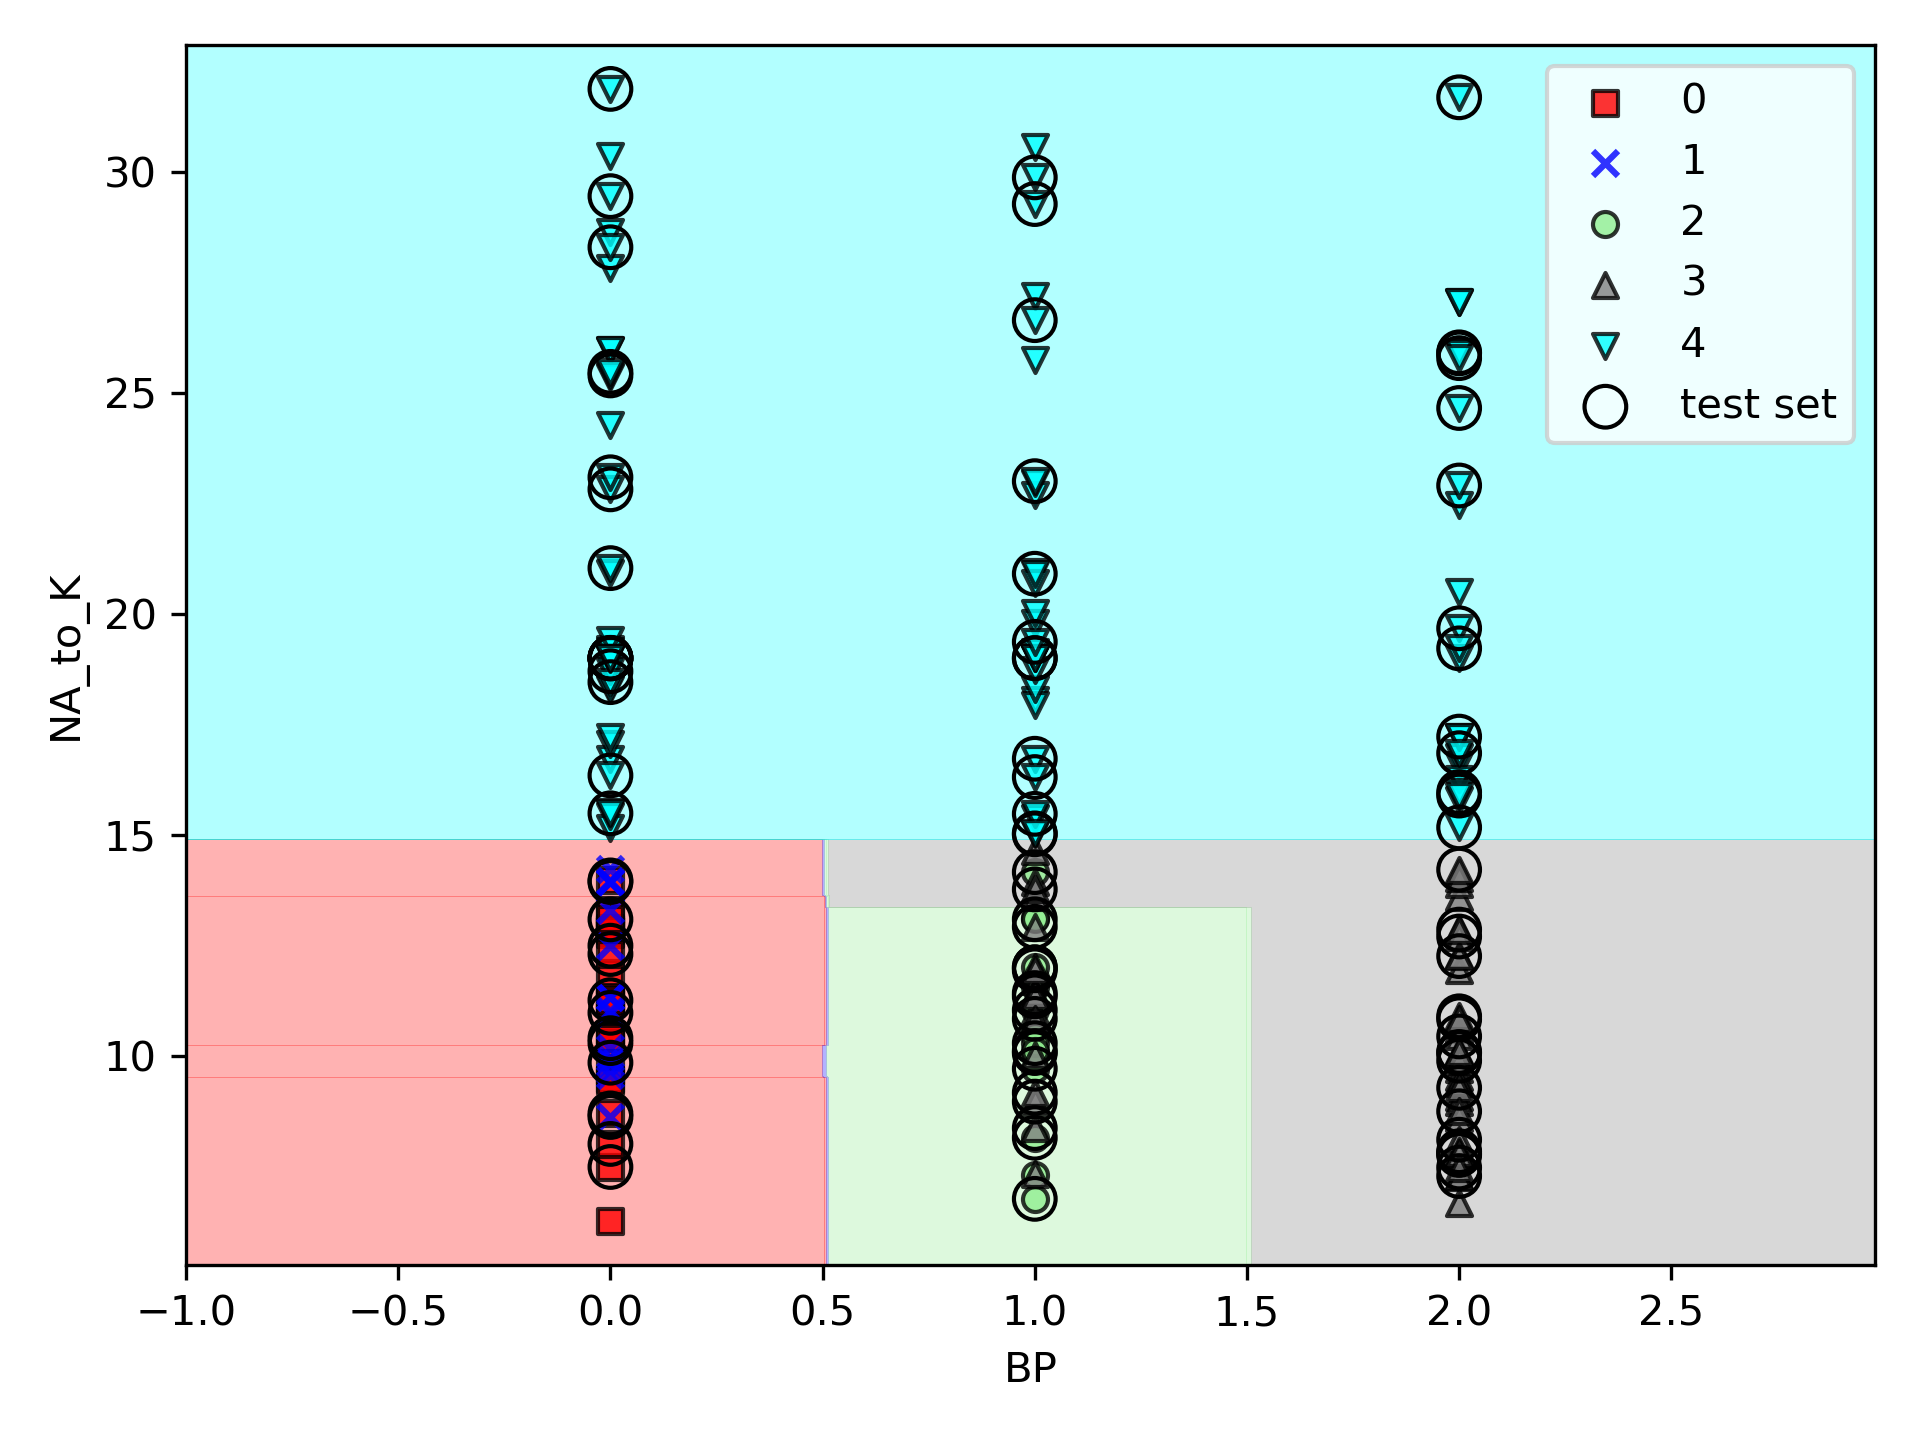

In [29]:
Image(filename='plots/plot_decision_regions.png', width=600) 

In [30]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)

In [31]:
from sklearn import metrics 
y_pred = tree_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8333333333333334


## Combining weak to strong learners via random forests

/tmp/ipykernel_127/1612307901.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_127/1612307901.py:41: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


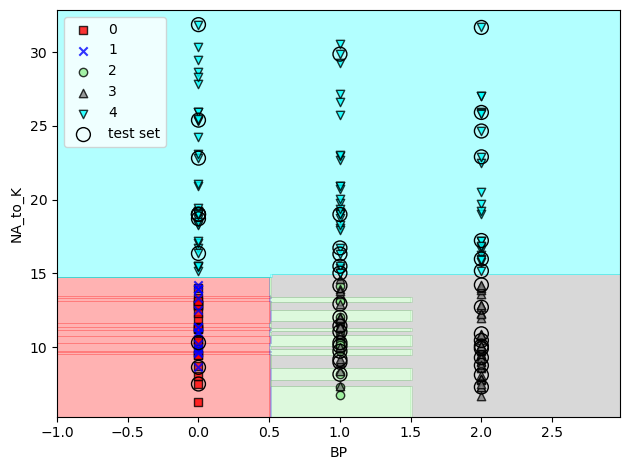

|--- feature_1 <= 14.906
|   |--- feature_1 <= 13.455
|   |   |--- feature_1 <= 9.541
|   |   |   |--- feature_0 <= 0.500
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  0.500
|   |   |   |   |--- feature_0 <= 1.500
|   |   |   |   |   |--- feature_1 <= 8.560
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- feature_1 >  8.560
|   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- feature_0 >  1.500
|   |   |   |   |   |--- class: 3.0
|   |   |--- feature_1 >  9.541
|   |   |   |--- feature_0 <= 0.500
|   |   |   |   |--- feature_1 <= 11.103
|   |   |   |   |   |--- feature_1 <= 9.670
|   |   |   |   |   |   |--- feature_1 <= 9.615
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_1 >  9.615
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  9.670
|   |   |   |   |   |   |--- feature_1 <= 10.195
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_1 >  10.195
|  

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('BP')
plt.ylabel('NA_to_K')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('plots/03_22.png', dpi=300)
plt.show()

from sklearn.tree import export_text

print(export_text(forest.estimators_[0], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[1], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[2], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[3], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[4], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[5], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[6], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[7], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[8], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[9], 
                  spacing=3, decimals=3))

In [33]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print (y_pred)
print (y_test)

0.8833333333333333
[0 4 4 4 3 4 2 4 3 3 1 4 4 0 4 4 4 4 3 4 2 2 0 4 0 1 4 4 4 3 4 4 3 1 3 3 0
 4 3 4 2 4 3 4 4 2 0 0 4 3 0 4 4 2 3 2 3 3 1 4]
[1 4 4 4 3 4 2 4 3 2 1 4 4 0 4 4 4 4 3 4 3 2 0 4 1 1 4 4 4 3 4 4 3 1 3 3 0
 4 3 4 2 4 3 4 4 2 0 0 4 3 0 4 4 3 3 3 3 3 0 4]


In [34]:
# Note: The sorted dataframe yielded a (very slightly) higher accuracy than the normal dataframe
# Note: pre-sorted dataframe yielded a score of 0.8 across decision tree and random forest

### How many dimensions does plot_decision_regions function works for? 

The plot_decision_regions function is typically used for visualizing decision boundaries in two-dimensional space. Therefore, it works for two-dimensional plots.

### What is the maximum accuracy you can achieve with the least amount of features?

The maximum accuracy we can achieve is 83.33\% with two features, BP and Na_to_K.

### How does the depth of the tree affect accuracy?

A deeper tree (higher depth) can capture more complex relationships within the training data, which can lead to higher accuracy on the training set. However, deeper trees are also more prone to overfitting, meaning they may perform poorly on unseen data.